<h1> Group 27 - Second Part of Codebase

<h4> Important Note: The following code was written as part of an academic project.

<h1> Text-to-Music Pipeline for Story Generation </h1>

The following notebook contains code for generating a music context aware prompt using Ollama and then a musical audio cue from the generated prompts for the generated video. Specifics of the model used and how it works is mentioned in the final report.

<br>

Note: The model used here requires significant compute. Please run the following code cells only on a GPU powered system or on resources like Google Colab, Kaggle, etc.

<h1> Generating Music Aware Prompts using Ollama

To generate music out of text we need to identify the musical context for the scene by generating a  music context aware prompt. To achieve this, we use Ollama which is a software that allows us to inference LLM’s on our local machines.

We use Mistral, a language model with 7B parameters, that is trained on a system prompt to help it find the right music prompt for the given story. This model is lightweight and can be run using ollama on a machine with as less as 4gb of RAM.


The image below shows the system prompt that we feed into Mistral using Ollama on our local machine.

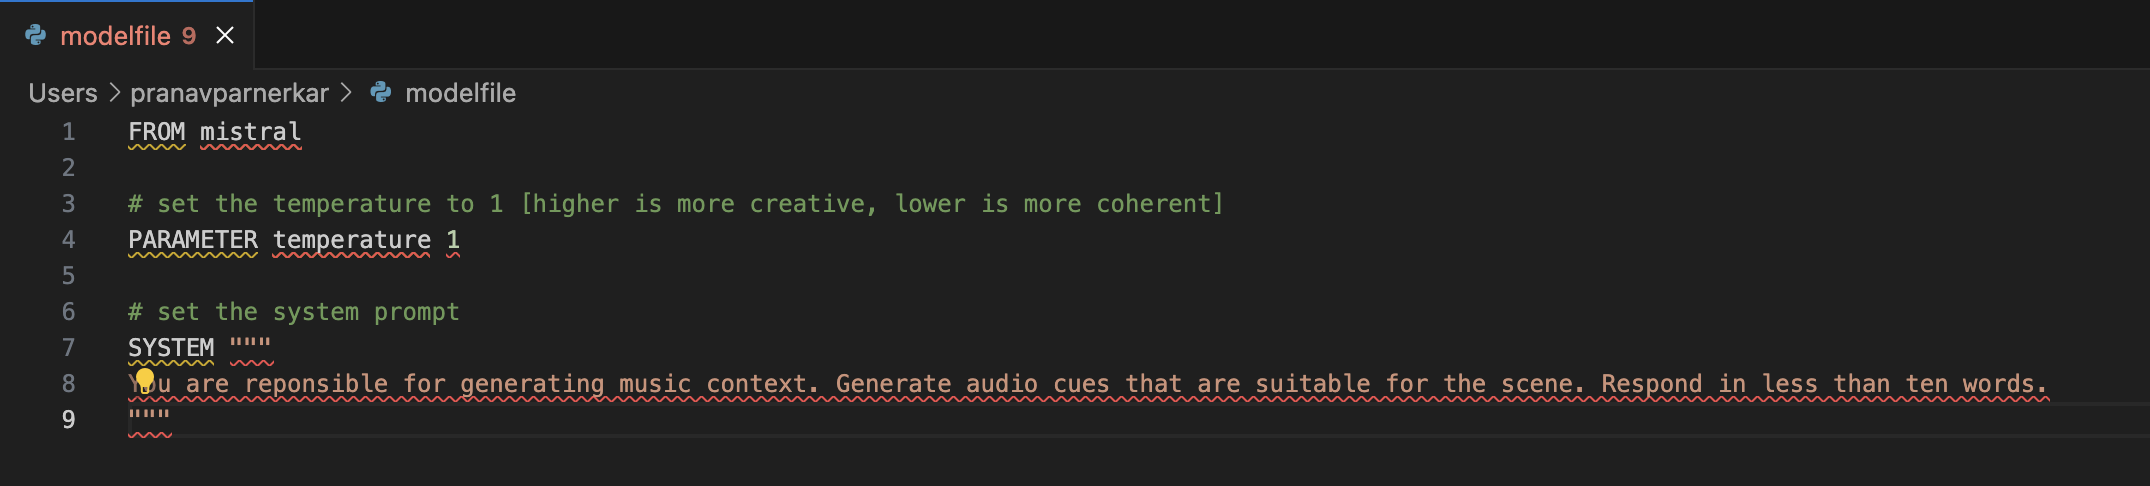

The image below shows some suggestions of music aware prompts generated by the Mistral LLM for the given story prompt as user input.

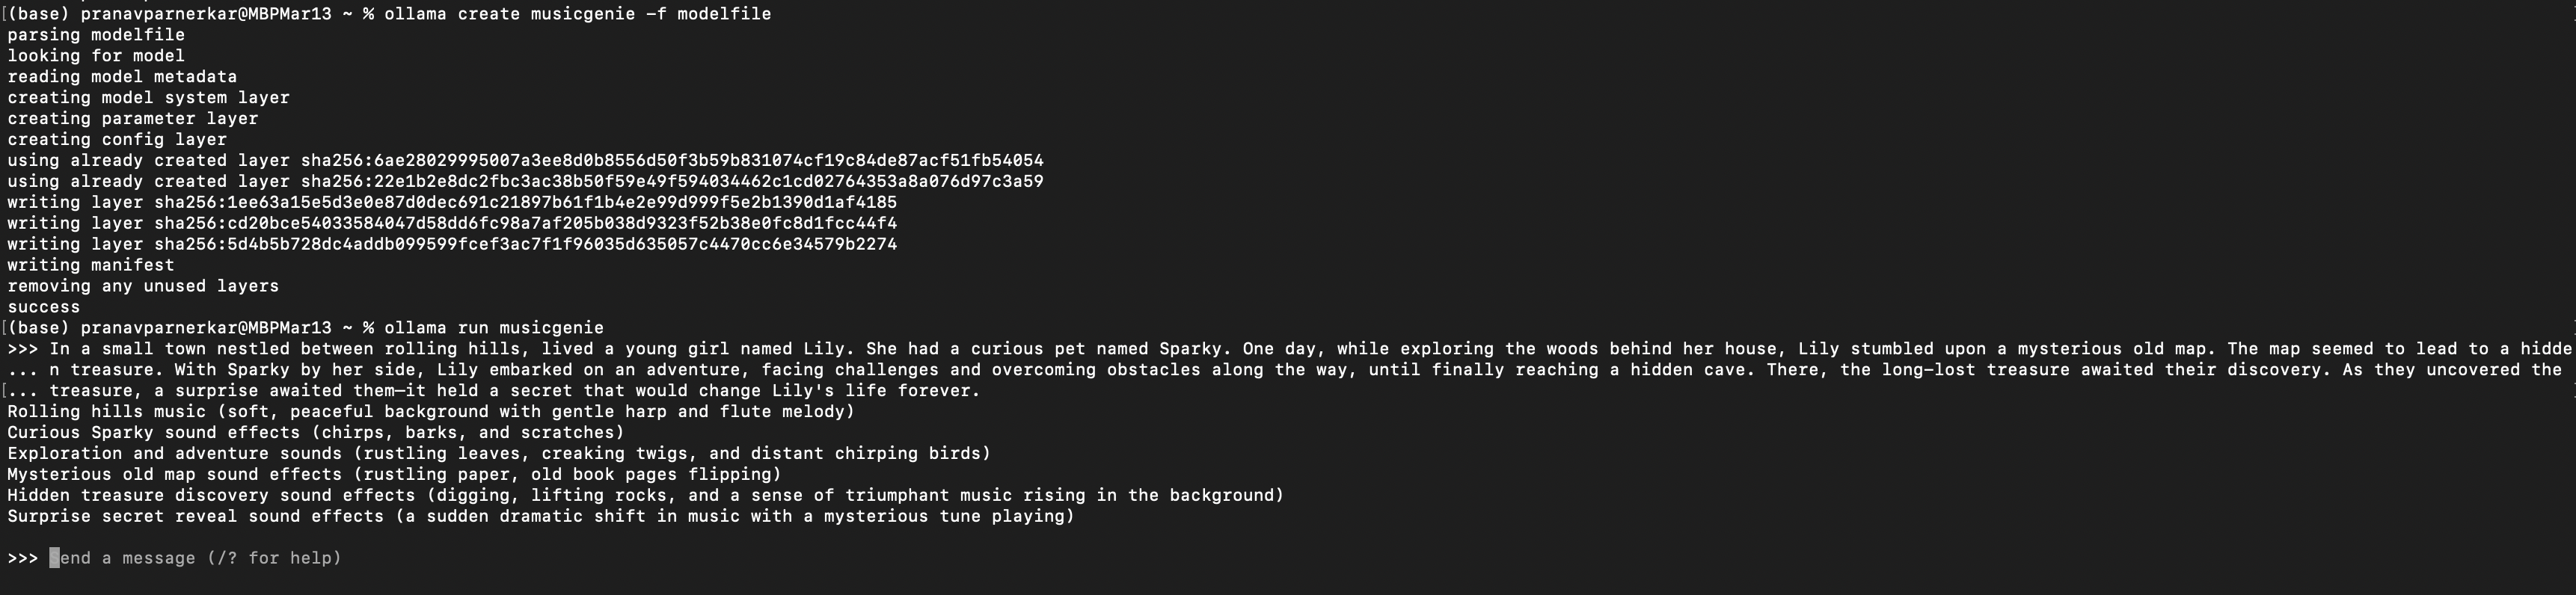

We take the above music aware context prompt suggestions and feed this into MusicGen to get the final output musical audio cue.

1. Installing the dependencies

In [1]:
!python3 -m pip install -U git+https://github.com/facebookresearch/audiocraft#egg=audiocraft
# !python3 -m pip install -U audiocraft

  Cloning https://github.com/facebookresearch/audiocraft to /tmp/pip-install-p7g_nxvh/audiocraft_94ae32237a0a4887a8bb7ff4327bed9b
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/audiocraft /tmp/pip-install-p7g_nxvh/audiocraft_94ae32237a0a4887a8bb7ff4327bed9b
  Resolved https://github.com/facebookresearch/audiocraft to commit 95f2747599593b072c3d84890c2183fe0cdba330
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 7.7 MB/s eta 0:00:00
  Prepari

2. Importing the libraries

In [2]:
from audiocraft.models import musicgen
from audiocraft.utils.notebook import display_audio
import torch
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

    PyTorch 2.1.0+cu121 with CUDA 1201 (you have 2.1.0+cu118)
    Python  3.10.13 (you have 3.10.12)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


3. Story Prompt with its length

In [4]:
story_prompt = 'In a small town nestled between rolling hills, lived a young girl named Lily. She had a curious pet named Sparky. One day, while exploring the woods behind her house, Lily stumbled upon a mysterious old map. The map seemed to lead to a hidden treasure. With Sparky by her side, Lily embarked on an adventure, facing challenges and overcoming obstacles along the way, until finally reaching a hidden cave. There, the long-lost treasure awaited their discovery. As they uncovered the treasure, a surprise awaited them—it held a secret that would change Lily\'s life forever.'
sentences = sent_tokenize(story_prompt)
num_clusters = len(sentences)

4. MusicGen Initialization and setting duration of each audio cue

In [5]:
model = musicgen.MusicGen.get_pretrained('medium', device='cuda')
model.set_generation_params(duration=num_clusters*2)

/usr/local/lib/python3.10/dist-packages/audiocraft/models/musicgen.py:127: UserWarning: MusicGen pretrained model relying on deprecated checkpoint mapping. Please use full pre-trained id instead: facebook/musicgen-medium
  warnings.warn(


state_dict.bin:   0%|          | 0.00/3.68G [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

compression_state_dict.bin:   0%|          | 0.00/236M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


5. Generating music from music aware prompts given by Ollama

In [6]:
res = model.generate([
    'Rolling hills music (soft, peaceful background with gentle harp and flute melody)',
    'Curious sparky sound effects (chirps, barks and scratches)',
    'Exploration and adventure sounds (rustling leaves, creaking twigs and distant chirping birds)',
    'Mysterious old map sound effects (rustling paper, old book pages flipping)',
    'Hidden treasure dicovery sound effects (digging, lifting rocks and sense a of triumphant music rising in the background)',
    'Surprise secret reveal sound effects (a sudden dramatic shift in music with a mysterious tune playing)'
],
    progress=True)
display_audio(res, 32000)